# TAREA 5

## Leer Datos

Primero se leen y se preparan los datos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
archivo = "/content/todos_datos_2.xlsx"

data= pd.read_excel(archivo)

data.pop("EMISIONES(sin 3B y 3D)(Gg en CO2e)")
data

,Año,Categoria,Fuente,Subfuente1,Subfuente2,Subfuente3,CO2,CH4,N2O,HFCs,PFCs,NF3,SF6,EMISIONES_NETAS(Gg en CO2e),Carbono_negro(Gg)
0,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de elect...,-,70302.750576,62.745182,139.850236,NaN,NaN,NaN,NaN,70505.345994,11.656345
1,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1b] Refinación del petróleo,-,11550.924752,11.131438,20.203821,NaN,NaN,NaN,NaN,11582.260011,2.190852
2,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1c] Manufactura de combustibles sólidos y o...,-,25911.446413,18.174816,27.485844,NaN,NaN,NaN,NaN,25957.107072,0.305281
3,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,-,5050.957286,3.683582,5.648170,NaN,NaN,NaN,NaN,5060.289038,0.122834
4,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A2] Industrias manufactura y de la construcción,[1A2b] Metales no ferrosos,-,2105.775916,1.876280,2.920578,NaN,NaN,NaN,NaN,2110.572775,0.038763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,2021,[4] Residuos,[4C] Incineración y quema a cielo abierto de ...,[4C1] Incineración de residuos peligrosos indu...,-,-,28.597444,0.041421,0.762761,NaN,NaN,NaN,NaN,29.401625,NaN
4124,2021,[4] Residuos,[4C] Incineración y quema a cielo abierto de ...,[4C2] Quema a cielo abierto de residuos sólidos,-,-,1705.641772,754.454674,164.777875,NaN,NaN,NaN,NaN,2624.874321,1.435000
4125,2021,[4] Residuos,[4D] Tratamiento y eliminación de aguas residu...,[4D1] Tratamiento y eliminación de aguas resid...,-,-,NaN,4930.620916,2781.021175,NaN,NaN,NaN,NaN,7711.642091,NaN
4126,2021,[4] Residuos,[4D] Tratamiento y eliminación de aguas residu...,[4D2] Tratamiento y eliminación de aguas resid...,-,-,NaN,20874.261433,2790.491065,NaN,NaN,NaN,NaN,23664.752498,NaN


## K medias

El método más utilizado en la bibliografía es el de K medias. Se importan las librerías necesarias:

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Rellenamos los nan con cero indicando una emisión nula:

In [4]:
data_num_ceros= data.copy()

for i in range(0,len(data_num_ceros.iloc[:,1])):
  for j in range(6,len(data_num_ceros.columns)):
    #aux = data_num_ceros.iloc[i,j].item()
    if np.isnan(data_num_ceros.iloc[i,j]) == True:
      data_num_ceros.iloc[i,j] = 0


data_num_ceros

,Año,Categoria,Fuente,Subfuente1,Subfuente2,Subfuente3,CO2,CH4,N2O,HFCs,PFCs,NF3,SF6,EMISIONES_NETAS(Gg en CO2e),Carbono_negro(Gg)
0,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de elect...,-,70302.750576,62.745182,139.850236,0.0,0.0,0.0,0.0,70505.345994,11.656345
1,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1b] Refinación del petróleo,-,11550.924752,11.131438,20.203821,0.0,0.0,0.0,0.0,11582.260011,2.190852
2,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1c] Manufactura de combustibles sólidos y o...,-,25911.446413,18.174816,27.485844,0.0,0.0,0.0,0.0,25957.107072,0.305281
3,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,-,5050.957286,3.683582,5.648170,0.0,0.0,0.0,0.0,5060.289038,0.122834
4,1990,[1] Energía,[1A] Actividades de quema del combustible,[1A2] Industrias manufactura y de la construcción,[1A2b] Metales no ferrosos,-,2105.775916,1.876280,2.920578,0.0,0.0,0.0,0.0,2110.572775,0.038763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,2021,[4] Residuos,[4C] Incineración y quema a cielo abierto de ...,[4C1] Incineración de residuos peligrosos indu...,-,-,28.597444,0.041421,0.762761,0.0,0.0,0.0,0.0,29.401625,0.000000
4124,2021,[4] Residuos,[4C] Incineración y quema a cielo abierto de ...,[4C2] Quema a cielo abierto de residuos sólidos,-,-,1705.641772,754.454674,164.777875,0.0,0.0,0.0,0.0,2624.874321,1.435000
4125,2021,[4] Residuos,[4D] Tratamiento y eliminación de aguas residu...,[4D1] Tratamiento y eliminación de aguas resid...,-,-,0.000000,4930.620916,2781.021175,0.0,0.0,0.0,0.0,7711.642091,0.000000
4126,2021,[4] Residuos,[4D] Tratamiento y eliminación de aguas residu...,[4D2] Tratamiento y eliminación de aguas resid...,-,-,0.000000,20874.261433,2790.491065,0.0,0.0,0.0,0.0,23664.752498,0.000000


Al igual que en la mayoría de la bibliografía se estandarizan los datos:

In [5]:
scaler = StandardScaler()

In [6]:
data_var = data_num_ceros.iloc[:,6:14]
scaled = scaler.fit_transform(data_var)
# https://datatofish.com/numpy-array-to-pandas-dataframe/
data_scaled = pd.DataFrame(scaled, columns = data_var.columns)
data_scaled

,CO2,CH4,N2O,HFCs,PFCs,NF3,SF6,EMISIONES_NETAS(Gg en CO2e)
0,3.209415,-0.171427,-0.090804,-0.076036,-0.055099,-0.072371,-0.072369,2.992439
1,0.429085,-0.179315,-0.177186,-0.076036,-0.055099,-0.072371,-0.072369,0.341113
2,1.108672,-0.178239,-0.171928,-0.076036,-0.055099,-0.072371,-0.072369,0.987929
3,0.121485,-0.180453,-0.187695,-0.076036,-0.055099,-0.072371,-0.072369,0.047648
4,-0.017891,-0.180729,-0.189664,-0.076036,-0.055099,-0.072371,-0.072369,-0.085079
...,...,...,...,...,...,...,...,...
4123,-0.116190,-0.181010,-0.191222,-0.076036,-0.055099,-0.072371,-0.072369,-0.178724
4124,-0.036827,-0.065719,-0.072807,-0.076036,-0.055099,-0.072371,-0.072369,-0.061937
4125,-0.117543,0.572487,1.816060,-0.076036,-0.055099,-0.072371,-0.072369,0.166949
4126,-0.117543,3.009011,1.822897,-0.076036,-0.055099,-0.072371,-0.072369,0.884782


### Elección de número de clusters

Usamos el método del codo:

Se crea una función para facilitar el calculo de la inercia

In [7]:
def f_kmeans(n_clusters):
    kmeans = KMeans(n_clusters = n_clusters, n_init = 'auto').fit(data_scaled)
    return kmeans.inertia_ / n_clusters

Se calcula la inercia para los posibles números de clusters y se guardan en una lista:

In [8]:
inertia = []
for i in range(2,9):
  inertia.append(f_kmeans(i))

Se pasa a un dataframe para facilitar su visualización:

In [9]:
df_inertias = pd.DataFrame({'n_clusters': range(2, 9), 'inertia': inertia})
df_inertias

,n_clusters,inertia
0,2,14672.932688
1,3,8292.418319
2,4,5355.355635
3,5,3649.483351
4,6,2563.308031
5,7,1552.488514
6,8,948.355598


Graficamos:

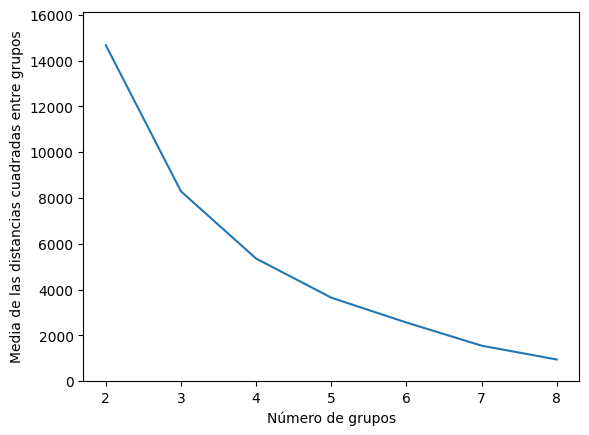

In [10]:
plt.figure()
plt.plot(df_inertias.n_clusters, df_inertias.inertia)
plt.xlabel('Número de grupos')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.ylim((0, 1.1 * df_inertias.inertia.max()))
plt.xticks(range(2, 9))
plt.show()

Parece se que lo mejor es conservar 4 clusters.

Comprobando:

In [11]:
from numpy import ones,vstack
from numpy.linalg import lstsq
points = [
    (df_inertias.iloc[0, :].n_clusters, df_inertias.iloc[0, :].inertia),
    (df_inertias.iloc[-1, :].n_clusters, df_inertias.iloc[-1, :].inertia)
]
x_coords, y_coords = zip(*points)
A = vstack([x_coords, ones(len(x_coords))]).T
m, b = lstsq(A, y_coords, rcond=None)[0]

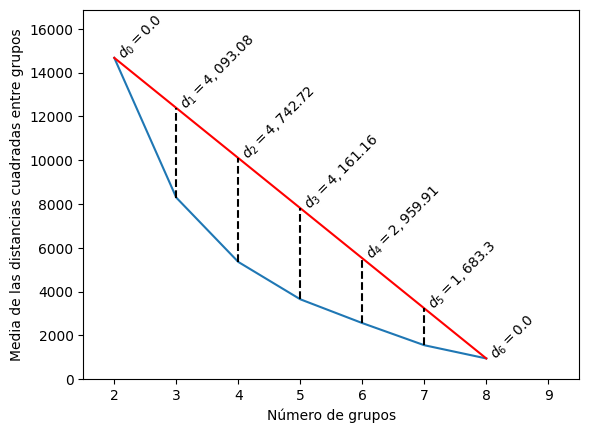

In [12]:
plt.figure()
plt.plot(df_inertias.n_clusters, df_inertias.inertia)
plt.plot(df_inertias.iloc[[0, -1], :].n_clusters, df_inertias.iloc[[0, -1], :].inertia, c='r')
for i, r in df_inertias.iterrows():
    d = '$d_{' + str(i) + '}' + f' = {abs(round(r.inertia - (m * r.n_clusters + b), 2)):,}$'
    plt.annotate(d, xytext=(r.n_clusters, m * r.n_clusters + b), xy=(r.n_clusters, m * r.n_clusters + b), rotation = 45)
    plt.plot([r.n_clusters, r.n_clusters], [r.inertia, m * r.n_clusters + b], '--k')
plt.xlabel('Número de grupos')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.xlim((1.5, 9.5))
plt.ylim((0, 1.15 * df_inertias.inertia.max()))
plt.xticks(range(2, 10))
plt.show()

Se elige usar 4 clusters:

In [13]:
kmeans = KMeans(n_clusters = 4, n_init = 'auto').fit(data_scaled)

In [14]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [15]:
df_centroids_freq = pd.DataFrame(np.unique(kmeans.labels_, return_counts = True)).T
df_centroids_freq.columns = ['ck', 'nk']
df_centroids_freq

,ck,nk
0,0,4022
1,1,10
2,2,64
3,3,32


Podemos imprimir los centros:

In [16]:
kmeans.cluster_centers_

array([[-9.06981856e-02, -8.22350122e-02, -8.85545756e-03,
         2.00392942e-03, -4.68501205e-02,  1.90733998e-03,
         1.90728410e-03, -1.10968950e-01],
       [-1.12977573e-01, -1.81016059e-01, -1.91772448e-01,
        -7.60358880e-02,  1.93720727e+01, -7.23709567e-02,
        -7.23688365e-02, -1.57475077e-01],
       [ 5.77623844e+00, -1.40696163e-01,  6.82360830e-01,
        -7.60358880e-02, -5.50994051e-02, -7.23709567e-02,
        -7.23688365e-02,  5.49028603e+00],
       [-1.17543185e-01,  1.06738729e+01, -1.91772448e-01,
        -7.60358880e-02, -5.50994051e-02, -7.23709567e-02,
        -7.23688365e-02,  3.01604879e+00]])

In [17]:
df_centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x','y','z','w','v','u','r','s'])
df_centers

,x,y,z,w,v,u,r,s
0,-0.090698,-0.082235,-0.008855,0.002004,-0.046850,0.001907,0.001907,-0.110969
1,-0.112978,-0.181016,-0.191772,-0.076036,19.372073,-0.072371,-0.072369,-0.157475
2,5.776238,-0.140696,0.682361,-0.076036,-0.055099,-0.072371,-0.072369,5.490286
3,-0.117543,10.673873,-0.191772,-0.076036,-0.055099,-0.072371,-0.072369,3.016049


Se grafican algunas caras:

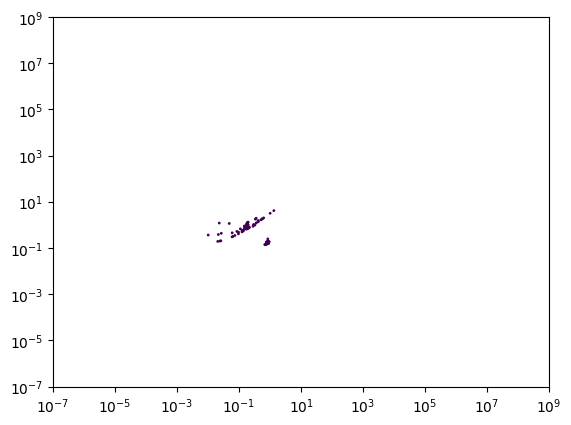

In [37]:
plt.figure()
plt.scatter(
    data_scaled.CO2,
    data_scaled.CH4,
    s = 1, # tamaño de los marcadores
    c = kmeans.labels_
)
plt.scatter(df_centers.x, df_centers.y, s=10, c='k')
plt.xscale("log")
plt.yscale("log")
plt.ylim(10**-7, 10**9)
plt.xlim(10**-7, 10**9)
plt.show()

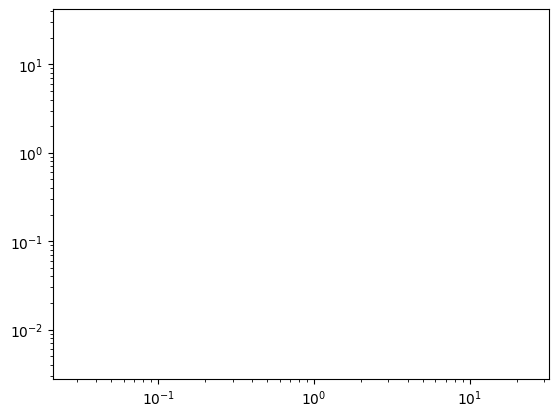

In [25]:
plt.figure()
plt.scatter(
    data_scaled.HFCs,
    data_scaled.PFCs,
    s = 1, # tamaño de los marcadores
    c = kmeans.labels_
)
plt.scatter(df_centers.x, df_centers.y, s=10, c='k')
plt.xscale("log")
plt.yscale("log")
plt.show()

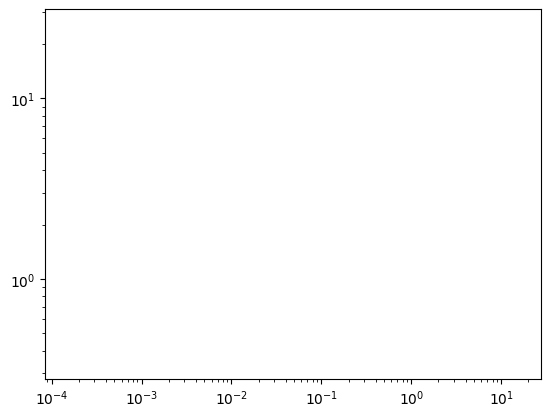

In [29]:
plt.figure()
plt.scatter(
    data_scaled.N2O,
    data_scaled.NF3,
    s = 1, # tamaño de los marcadores
    c = kmeans.labels_
)
plt.scatter(df_centers.x, df_centers.y, s=10, c='k')
plt.xscale("log")
plt.yscale("log")
plt.show()

## Otro algoritmo no supervisado

Usamos en esta ocasión Nearest Neighbor

## Bibliografía

* https://zenodo.org/records/1228469
* http://sedici.unlp.edu.ar/handle/10915/71114
* https://www.mdpi.com/2077-0472/13/7/1354
* https://www.sciencedirect.com/science/article/pii/S1309104215305754
* https://www.sciencedirect.com/science/article/abs/pii/S037842902300014X (nearest neighbor)